In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from generateODE import *
from np2df import *
from Calc_parameters import *
from solve_ode import *
from plots import *
import seaborn as sns

C:\Users\saiak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Base Model equations

\begin{equation}
P0 ---\alpha0---> P0 + n_A*A + n_G*G \\
P1 ---\alpha_I---> P1 + n_A*A + n_G*G  \\
P_T ----\alpha_R---> P_T + R \\
2R + 2A <----^{k1R}--_{kd1}---> R*  \\
R* + P0 <-----^{k2R}---_{kd2}---> P1 \\
R, A, G ---d_R, d_A, d_G----> \emptyset
\end{equation}

# Model Simulations

## Quorum sensing model expresssing GFP

In [2]:
basedf = convert2df()
basedf.quorum(solve_baseModel())
base_df = basedf.returndf()
#Plot GFP vs Time for "BASE MODEL"
fig = px.line(x = t, y = base_df.GFP, labels={'x':'Time (hr)', 'y':'GFP (AU)'})
fig.show()

## qCRISPRi model

global t1, data, pT
t1 = np.array([0,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.67,4.92,5.17,5.42,5.67,5.92,6.17,6.42,6.67,6.92,
7.17,7.42,7.67,7.92,8.17,8.42,8.67,8.92,9.17,9.42,9.67,9.92,10.17,10.42,10.67,10.92,11.17,11.42,11.67,11.92,12.17,12.42,
12.67,12.92,13.17,13.42,13.67,13.92,14.17,14.42,14.67,14.92,15.17,15.42,15.67,15.92,16.17,16.42,16.67,16.92,17.17,17.42,17.67,17.92,
18.17,18.42,18.67,18.92,19.17,19.42,19.67,19.92,20.17,20.42,20.67,20.92,21.17,21.42,21.67,21.92])

data = np.array([1088.624251,1260.438965,1485.281933,1699.11325,1857.211851,1951.027076,2073.620096,2197.519663,2364.933469,2565.224214,2831.139171,
3055.965984,3172.23231,3347.471767,3474.815855,3634.209611,3557.49539,3428.414001,3266.718174,3106.230629,2952.311002,
2808.418885,2647.544055,2500.475585,2355.574804,2221.579685,2096.932823,1976.399767,1897.360975,1825.710846,1773.694892,
1739.517937,1716.268215,1696.272894,1678.826062,1639.267998,1640.102249,1607.554676,1598.770382,1575.605288,1528.543537,
1529.248345,1509.297806,1507.059924,1484.442584,1452.173858,1459.705663,1435.436257,1433.261921,1414.454648,1396.025196,
1395.540996,1375.180464,1361.457635,1358.000306,1330.281394,1332.725478,1326.978548,1311.139835,1283.598068,1285.295765,
1285.056801,1268.473148,1273.596469,1267.30323,1264.692285,1238.569005,1244.926781,1223.596365,1237.268055,1214.939911,
1184.987085,1190.465231,1185.214753,1180.405594,1167.185746,1164.632786,1164.975207,1159.135142,1152.10913,1129.458807,1123.356697,
1120.747004,1126.335686,1113.893817])
                
data = np.reshape(data, (85,1))

In [7]:
#import data
global t1, data, pT
data = pd.read_excel('qCRISPRi_wildVSmutant_130221_cleaned.xlsx')
data

time     wildgfp1     wildgfp2     wildgfp3   mutantgfp1   mutantgfp2  \
0    0.00  1444.308495  1146.560329   691.268214  1763.925153  1449.135992   
1    0.25  1510.791167  1152.814995   716.510970  1642.335951  1588.784949   
2    0.50  1661.375831  1287.297323   995.203794  2034.313838  2088.744600   
3    0.75  1966.292320  1603.773303  1350.877163  2483.221245  2469.879464   
4    1.00  2270.531104  1827.515592  1623.794215  2732.557652  2794.520779   
..    ...          ...          ...          ...          ...          ...   
83  21.17  1163.493745  1128.385507  1098.875165  2403.565972  2298.699025   
84  21.42  1145.106386  1147.868083  1089.387702  2408.885613  2307.950487   
85  21.67  1177.341034  1137.919755  1083.111667  2402.108953  2312.172355   
86  21.92  1181.327849  1115.211175  1065.548298  2420.404458  2302.362530   
87  22.17  1079.377397  1131.966252  1061.817665  2407.342814  2269.316356   

     mutantgfp3   wildod1   wildod2   wildod3  ...  mutantod2  mutantod3  \
0   1766.200962  0.027233  0.033433  0.064133  ...   0.034733   0.026233   
1   2000.000427  0.027800  0.037300  0.064200  ...   0.032100   0.025500   
2   2482.566015  0.031500  0.039100  0.055600  ...   0.030800   0.023900   
3   3098.038670  0.035600  0.042400  0.057000  ...   0.033200   0.025500   
4   3390.411816  0.041400  0.048700  0.062200  ...   0.036500   0.029200   
..          ...       ...       ...       ...  ...        ...        ...   
83  2345.658504  0.407967  0.407367  0.423767  ...   0.404867   0.398467   
84  2349.433058  0.410733  0.401033  0.426233  ...   0.397033   0.396833   
85  2337.912690  0.405433  0.408933  0.425933  ...   0.400633   0.397933   
86  2281.790407  0.395600  0.406500  0.429200  ...   0.399300   0.402900   
87  2286.709224  0.428333  0.403133  0.433533  ...   0.404233   0.402033   

     avgwildgfp  stdwildgfp  avgmutantgfp  stdmutantgfp  avgwildod  stdwildod  \
0   1094.045680  379.256849   1659.754036    182.404125   0.041600   0.019759   
1   1126.705711  397.783268   1743.707109    223.565709   0.043100   0.018880   
2   1314.625649  333.925776   2201.874818    244.604453   0.042067   0.012321   
3   1640.314262  309.330544   2683.713127    358.878451   0.045000   0.010934   
4   1907.280304  330.664418   2972.496749    363.248688   0.050767   0.010553   
..          ...         ...           ...           ...        ...        ...   
83  1130.251472   32.349677   2349.307834     52.528633   0.413033   0.009300   
84  1127.454057   32.995337   2355.423053     50.733470   0.412667   0.012711   
85  1132.790818   47.323598   2350.731333     46.318313   0.413433   0.010966   
86  1120.695774   58.084307   2334.852465     74.800807   0.410433   0.017142   
87  1091.053772   36.502868   2321.122798     75.173442   0.421667   0.016260   

    avgmutantod  stdmutantod  
0      0.028700     0.005254  
1      0.028333     0.003398  
2      0.027300     0.003451  
3      0.029500     0.003859  
4      0.033367     0.003758  
..          ...          ...  
83     0.397400     0.008053  
84     0.392667     0.007391  
85     0.394733     0.007996  
86     0.393733     0.012886  
87     0.396467     0.011599  

[88 rows x 21 columns]

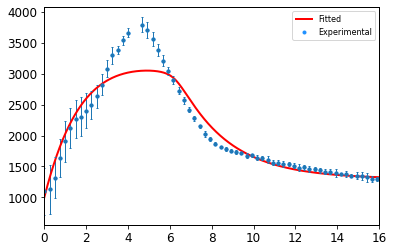

In [8]:
qcrispridf = convert2df()
qcrispridf.qcrispri(solve_qCRISPRi( activity_ratio = 0.1))
qcrispri_df = qcrispridf.returndf()


#Plot GFP vs Time for "qCRISPRi MODEL"
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(t, qcrispri_df.GFP, linewidth = 2, color = 'red', label = 'Fitted')
plt.plot(data.time, data.avgwildgfp, '.', label = 'Experimental', color = 'dodgerblue')
plt.errorbar(data.time, data.avgwildgfp, yerr=data.stdwildgfp, fmt=".", elinewidth = 1, capsize=1.2)
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
#ax.set_xlabel('Time (hr)', fontsize = 12)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 12)
ax.legend(prop={"size":8}, loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=8)
plt.legend()
plt.show()
#fig.savefig('Figures\Model-fit.png', dpi=256, bbox_inches = "tight")




C:\Users\saiak\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\saiak\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


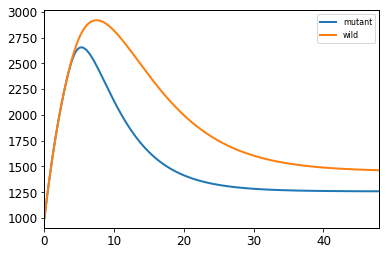

In [2]:
#simuating experiment
qcrispridf = convert2df()
qcrispridf.qcrispri(solve_qCRISPRi(alphaIac = alphaI*5, Kd1 = kd1*1.5, Kd2 = kd2*1.5))
qcrispri_df = qcrispridf.returndf()

qcrispridf.qcrispri(solve_qCRISPRi())
qcrispri_df1 = qcrispridf.returndf()


#Plot GFP vs Time for "qCRISPRi MODEL"
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(t, qcrispri_df.GFP, linewidth = 2, label = 'mutant')
plt.plot(t, qcrispri_df1.GFP, linewidth = 2, label = 'wild')

ax.set_xlim(0,48)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
#ax.set_xlabel('Time (hr)', fontsize = 12)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 12)
ax.legend(prop={"size":8}, loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=8)
plt.legend()
plt.show()
#fig.savefig('Figures\Model-fit.png', dpi=256, bbox_inches = "tight")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


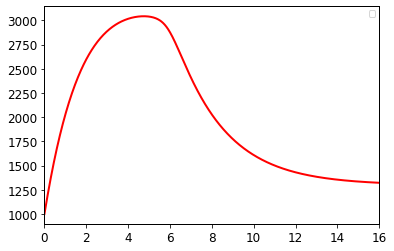

In [3]:
qcrispridf = convert2df()
qcrispridf.qcrispri(solve_qCRISPRi( activity_ratio = 0.1))
qcrispri_df = qcrispridf.returndf()


#Plot GFP vs Time for "qCRISPRi MODEL"
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(t, qcrispri_df.GFP, linewidth = 2, color = 'red')
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
#ax.set_xlabel('Time (hr)', fontsize = 12)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 12)
ax.legend(prop={"size":8}, loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=8)
plt.legend()
plt.show()
fig.savefig('Figures\definitions.png', dpi=350, bbox_inches = "tight")

## qCRISPRi Decoy Model

In [6]:
qcrispriDecoydf = convert2df()
qcrispriDecoydf.qcrispri_sponge(solve_qCRISPRi_sponge())
qcrispri_Decoydf = qcrispriDecoydf.returndf()
#Plot GFP vs Time for "qCRISPRi decoy MODEL"
fig = go.Figure()
fig.add_trace(go.Scatter(x = t, y = qcrispri_Decoydf.GFPc, name = 'Control GFP'))
fig.add_trace(go.Scatter(x = t , y = qcrispri_Decoydf.GFP, name = 'qCRISPRi:Decoy'))
fig.show()

# Sensitivity Analysis: One Parameter at Once
Analze how changing leaky expression rate of dCas9 promoter(luxI), dissociation constant between DNA and LuxR:AHL compelx (kd2), and dissociation constant between AHL and LuxR(kd1) affects circuit parameters. All these 3 parameters were changed one at a time and the change in circuit parameters switching density, fold repression and transition time were calculated. 

In [2]:
alphaT_range = [0, round(alpha0*0.5, 1), alpha0, round(alpha0*1.5, 1), round(alpha0*2, 1)]
Kd1_range = [kd1*0.25, kd1*0.5, kd1, kd1*1.5, kd1*1.75]
Kd2_range = [kd2*0.25, kd2*0.5, kd2, kd2*1.5, kd2*1.75]

## Basal expression / leakiness

C:\Users\saiak\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\saiak\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\saiak\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


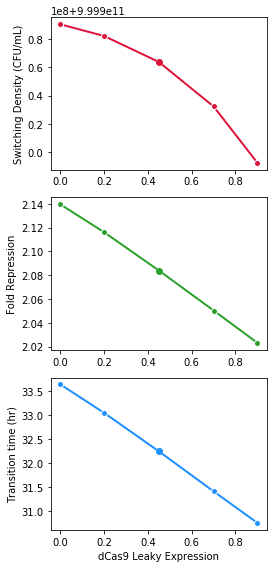

In [3]:
#simulating qcrispri dynamics with varying leaky expression rates and calculating 
#parameters switching density, fold repression, and transition time
alphaT_range = [0, round(alpha0*0.5, 1), alpha0, round(alpha0*1.5, 1), round(alpha0*2, 1)]
gfp_leaky, params_leaky = single_param_vary("alphaT", alphaT_range )
fig = vStack_3plots(params_leaky, 'alphaT', 'dCas9 Leaky Expression')

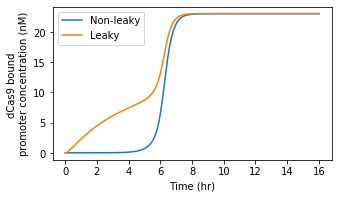

In [5]:
qcrispridf11 = convert2df()
qcrispridf11.qcrispri(solve_qCRISPRi(alphaT = 0))
nonleaky = qcrispridf11.returndf()

qcrispridf11.qcrispri(solve_qCRISPRi())
leaky = qcrispridf11.returndf()

fig, ax = plt.subplots(figsize=(5,2.82))
ax.plot(t, nonleaky.pD, label = "Non-leaky")
ax.plot(t, leaky.pD, label = 'Leaky' )
plt.ylabel('dCas9 bound \npromoter concentration (nM)')
plt.xlabel('Time (hr)')
plt.legend()
plt.show()
#fig.savefig('Figures\leaky_vs_non_leaky_dCas9_bound_promoter', dpi = 386, bbox_inches = 'tight')

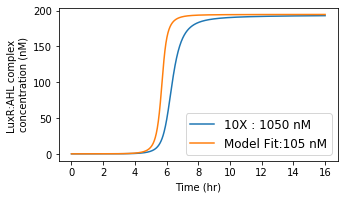

In [44]:
qcrispridf11 = convert2df()
qcrispridf11.qcrispri(solve_qCRISPRi(Kd1 = kd1*10))
lowkd1 = qcrispridf11.returndf()

qcrispridf11.qcrispri(solve_qCRISPRi())
wildkd1 = qcrispridf11.returndf()

fig, ax = plt.subplots(figsize=(5,2.82))
ax.plot(t, lowkd1.LuxR_A, label = "10X : 1050 nM")
ax.plot(t, wildkd1.LuxR_A, label = 'Model Fit:105 nM' )
plt.ylabel('LuxR:AHL complex \nconcentration (nM)')
plt.xlabel('Time (hr)')
plt.legend()
plt.show()
fig.savefig('Figures/kd1vary_LuxR_A_dynamics', dpi = 386, bbox_inches = 'tight')

In [6]:
### dynamics of changing leakiness
x = t
fig = go.Figure()

for i in [0, alpha0, round(alpha0*1.5, 1)]:
    #x = gfp_leaky[gfp_leaky["alphaT"] == i].N
    y = gfp_leaky[gfp_leaky["alphaT"] == i].GFP
    fig.add_trace(go.Scatter(x = t, y = y, name = i))
yc = gfp_leaky[gfp_leaky["alphaT"] == 0].control
fig.add_trace(go.Scatter(x = t, y = yc, name = 'Control' ))

fig.update_layout( xaxis_title='Time (hr)', yaxis_title='GFP [AU]')
fig.update_layout(font=dict(size=20))
fig.update_layout(legend=dict(yanchor="top",y=0.90,xanchor="right",x=0.99,bgcolor="rgba(0,0,0,0)", bordercolor="Black",
        borderwidth=1))
fig.update_layout({'paper_bgcolor':'rgba(0,0,0,0)','plot_bgcolor':'rgba(0,0,0,0)'})
fig.update_xaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(font_family="Verdana", font_color="black")
fig.update_xaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.update_yaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.show()

## Dissociation constant of LuxR_AHL complex (Kd1)

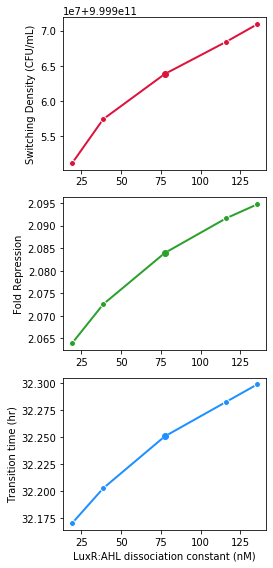

In [4]:
#simulating qcrispri dynamics with varying dissociation constant of LuxR_AHL complex and calculating 
#parameters switching density, fold repression, and transition time
Kd1_range = [kd1*0.25, kd1*0.5, kd1, kd1*1.5, kd1*1.75]
gfp_kd1, params_kd1 = single_param_vary("Kd1", Kd1_range )
fig = vStack_3plots(params_kd1, 'Kd1', 'LuxR:AHL dissociation constant (nM)')


In [61]:
### dynamics of changing dissociation constant for luxR_AHL complex
x = t
fig = go.Figure()

for i in [kd1*0.25, kd1, kd1*1.75]:
    #x = gfp_kd1[gfp_kdna["kd1lex"] == i].N
    y = gfp_kd1[gfp_kd1["Kd1"] == i].GFP
    fig.add_trace(go.Scatter(x = t, y = y, name = '{}'.format(i)))
fig.update_layout( xaxis_title='Time (hr)', yaxis_title='GFP [AU]')
fig.update_layout(font=dict(size=20))
fig.update_layout(legend=dict(yanchor="top",y=0.90,xanchor="right",x=0.99,bgcolor="rgba(0,0,0,0)", bordercolor="Black",
        borderwidth=1))
fig.update_layout({'paper_bgcolor':'rgba(0,0,0,0)','plot_bgcolor':'rgba(0,0,0,0)'})
fig.update_xaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(font_family="Verdana", font_color="black")
fig.update_xaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.update_yaxes(ticks="outside",tickson="boundaries",ticklen=5)

fig.show()

## Dissociation constant for LuxR_AHL complex and DNA (Kd2)

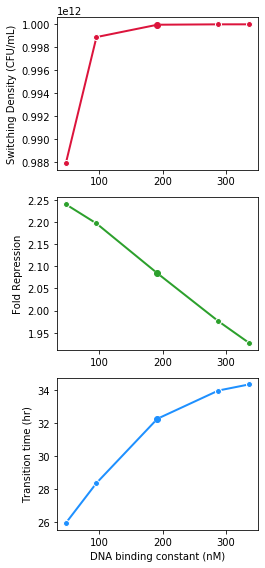

In [5]:
#simulating qcrispri dynamics with varying dissociation constant for LuxR_AHL complex and calculating 
#parameters switching density, fold repression, and transition time
Kd2_range = [kd2*0.25, kd2*0.5, kd2, kd2*1.5, kd2*1.75]
gfp_kd2, params_kd2 = single_param_vary("Kd2", Kd2_range )
fig = vStack_3plots(params_kd2, 'Kd2', 'DNA binding constant (nM)')

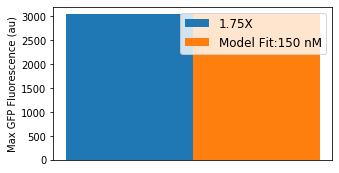

In [45]:
qcrispridf11 = convert2df()
qcrispridf11.qcrispri(solve_qCRISPRi(Kd2 = kd2*1.75))
highkd2 = qcrispridf11.returndf()

qcrispridf11.qcrispri(solve_qCRISPRi())
wildkd2 = qcrispridf11.returndf()
width=0.1
fig, ax = plt.subplots(figsize=(5,2.82))
ax.bar( 0, max(highkd2.GFP), width, label = "1.75X")
ax.bar(0+ width, max(wildkd2.GFP), width, label = 'Model Fit:150 nM' )
plt.ylabel('Max GFP Fluorescence (au)')
ax.tick_params(bottom = False)
ax.set_xticklabels(labels = '')
plt.legend()
plt.show()
fig.savefig('Figures\kd2vary_MaxGFP', dpi = 386, bbox_inches = 'tight')

In [63]:
### dynamics of changing dissociation constant for luxR_AHL complex
x = t
fig = go.Figure()

for i in [kd2*0.25, kd2, kd2*1.75]:
    #x = gfp_kd2[gfp_kd2["kd2_bind"] == i].N
    y = gfp_kd2[gfp_kd2["Kd2"] == i].GFP
    fig.add_trace(go.Scatter(x = t, y = y, name = 'Kd2 = {}'.format(i)))
fig.update_layout( xaxis_title='Time (hr)', yaxis_title='GFP [AU]')
fig.update_layout(font=dict(size=20))
fig.update_layout(legend=dict(yanchor="top",y=0.90,xanchor="right",x=0.99,bgcolor="rgba(0,0,0,0)", bordercolor="Black",
        borderwidth=1))
fig.update_layout({'paper_bgcolor':'rgba(0,0,0,0)','plot_bgcolor':'rgba(0,0,0,0)'})
fig.update_xaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(font_family="Verdana", font_color="black")
fig.update_xaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.update_yaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.show()

## compiled image for parameter

In [10]:
density = pd.concat([params_leaky.act_density,params_kd1.act_density, params_kd2.act_density]) 
fold = pd.concat([params_leaky.FoldRepression,params_kd1.FoldRepression, params_kd2.FoldRepression]) 
time = pd.concat([params_leaky.Transition_time,params_kd1.Transition_time, params_kd2.Transition_time])
min_density = min(density)
max_density = max(density)
min_fold = min(fold)
max_fold = max(fold)
min_time = min(time)
max_time = max(time)

C:\Users\saiak\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



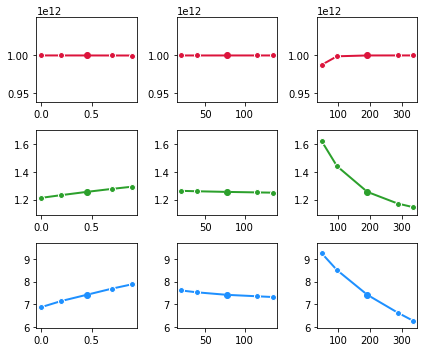

In [11]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9) ) = plt.subplots(3,3, figsize =(6,5))
ax1.plot(params_leaky.alphaT, params_leaky.act_density, "C1o-", mec = '1.0', color = 'crimson', linewidth = 2)
ax1.plot(alpha0, params_leaky.act_density.iloc[2], marker = "o", color = 'crimson')
ax1.set_ylim(0.95*min_density, 1.05*max_density)
#ax1.set_ylabel('Switching Density\n(CFU/mL)', fontsize = 8)

ax2.plot(params_kd1.Kd1, params_kd1.act_density, "C1o-", mec = '1.0', color = 'crimson', linewidth = 2)
ax2.plot(kd1, params_kd1.act_density.iloc[2], marker = "o", color = 'crimson')
ax2.set_ylim(0.95*min_density, 1.05*max_density)
#ax2.set_ylabel('Switching Density (CFU/mL)')

ax3.plot(params_kd2.Kd2, params_kd2.act_density, "C1o-", mec = '1.0', color = 'crimson', linewidth = 2)
ax3.plot(kd2, params_kd2.act_density.iloc[2], marker = "o", color = 'crimson')
ax3.set_ylim(0.95*min_density, 1.05*max_density)
#ax3.set_ylabel('Switching Density (CFU/mL)')


ax4.plot(params_leaky.alphaT, params_leaky.FoldRepression, "C1o-", mec = '1.0', color = 'C2', linewidth = 2)
ax4.plot(alpha0, params_leaky.FoldRepression.iloc[2], marker = "o", color = 'C2')
ax4.set_ylim(0.95*min_fold, 1.05*max_fold)
#ax4.set_ylabel('Fold Repression', fontsize = 8)

ax5.plot(params_kd1.Kd1, params_kd1.FoldRepression, "C1o-", mec = '1.0', color = 'C2', linewidth = 2)
ax5.plot(kd1, params_kd1.FoldRepression.iloc[2], marker = "o", color = 'C2')
ax5.set_ylim(0.95*min_fold, 1.05*max_fold)
#ax5.set_ylabel('Fold Repression')

ax6.plot(params_kd2.Kd2, params_kd2.FoldRepression, "C1o-", mec = '1.0', color = 'C2', linewidth = 2)
ax6.plot(kd2, params_kd2.FoldRepression.iloc[2], marker = "o", color = 'C2')
ax6.set_ylim(0.95*min_fold, 1.05*max_fold)
#ax6.set_ylabel('Fold Repression')

ax7. plot(params_leaky.alphaT, params_leaky.Transition_time, "C1o-", mec = '1.0', color = 'dodgerblue', linewidth = 2)
ax7.plot(alpha0, params_leaky.Transition_time.iloc[2], marker = "o", color = 'dodgerblue')
#ax7.set_xlabel('dCas9 Leaky Expression', fontsize = 8)
ax7.set_ylim(0.95*min_time, 1.05*max_time)
#ax7.set_ylabel('Transition time (hr)', fontsize = 8)

ax8. plot(params_kd1.Kd1, params_kd1.Transition_time, "C1o-", mec = '1.0', color = 'dodgerblue', linewidth = 2)
ax8.plot(kd1, params_kd1.Transition_time.iloc[2], marker = "o", color = 'dodgerblue')
#ax8.set_xlabel('LuxR:AHL complex dissociation constasnt', fontsize = 8)
ax8.set_ylim(0.95*min_time, 1.05*max_time)
#ax8.set_ylabel('Transition time (hr)')

ax9. plot(params_kd2.Kd2, params_kd2.Transition_time, "C1o-", mec = '1.0', color = 'dodgerblue', linewidth = 2)
ax9.plot(kd2, params_kd2.Transition_time.iloc[2], marker = "o", color = 'dodgerblue')
#ax9.set_xlabel('DNA binding conatant (nM)', fontsize = 8)
ax9.set_ylim(0.95*min_time, 1.05*max_time)
#ax9.set_ylabel('Transition time (hr)')

fig.tight_layout()
fig.show()
#fig.savefig('Figures\singleSensi_param.png', dpi=300)

In [108]:
dpi = 300
print('x: %d' % (1920/dpi))
print('y: %d' % (1080/dpi))

x: 6
y: 3


## compiled image for dynamics

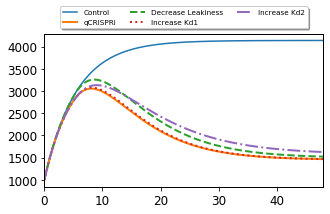

In [6]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize = (5,2.82))
plt.plot(t, gfp_leaky[gfp_leaky["alphaT"] == 0].control, linewidth = 1.5, label='Control', color = colors[0]) 
plt.plot(t, gfp_leaky[gfp_leaky["alphaT"] == alpha0].GFP, linewidth = 2, label='qCRISPRi', color = colors[1])
plt.plot(t, gfp_leaky[gfp_leaky["alphaT"] == 0].GFP, linewidth = 2, linestyle = '--', label='Decrease Leakiness', color = colors[2])  
plt.plot(t, gfp_kd1[gfp_kd1["Kd1"] == 1.75*kd1].GFP, linewidth = 2, linestyle = ':', label='Increase Kd1', color = colors[3])
plt.plot(t, gfp_kd2[gfp_kd2["Kd2"] == 1.75*kd2].GFP, linewidth = 2, linestyle = '-.', label='Increase Kd2', color = colors[4])
ax.set_xlim(0,48)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
#ax.set_xlabel('Time (hr)', fontsize = 12)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 12)
ax.legend(prop={"size":8}, loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=8)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True,prop={'size': 7.25})
#fig.savefig('Figures\singleSensi_dynamics.png', dpi=356, bbox_inches = "tight")

# Sensitiviy Analysis: 2 Parameters together

## Leakiness + dCas9 Repression strength on dynamics

In [9]:
params, gfp = twoParam_vary('alphaT', alphaT_range, 'activity_ratio', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

Text(0, 0.5, '')

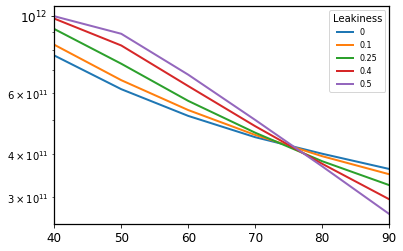

In [10]:
plot2param_vary(params, 'activity_ratio', 'act_density', 'Repression Strength (%)', 'Switching Density (CFU/mL)')
#plt.xlim(0.1,0.7)
#plt.ylim(10**8, 6*10**8)
plt.yscale('log');
plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])
#for illustrator figure
plt.xlabel('')
plt.ylabel('')
#plt.gcf().set_size_inches(5, 2.82)
#plt.savefig('Figures\leaky_couples_sd_repr.png', dpi = 256, bbox_inches = 'tight')

([<matplotlib.axis.XTick at 0x218342611c8>,
 <a list of 6 Text xticklabel objects>)

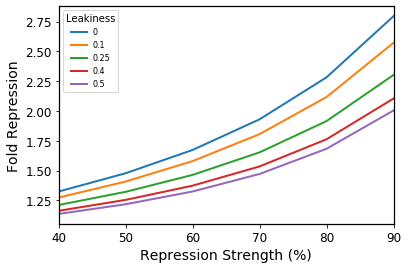

In [17]:
plot2param_vary(params, 'activity_ratio', 'FoldRepression', 'Repression Strength (%)', 'Fold Repression')
plt.xlim(0.1,0.6)
plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])

([<matplotlib.axis.XTick at 0x21833cc5408>,
 <a list of 6 Text xticklabel objects>)

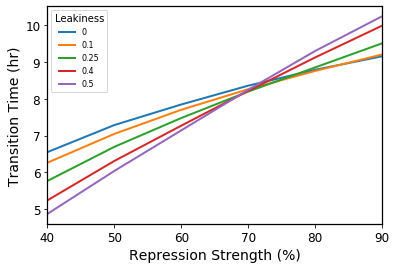

In [22]:
plot2param_vary(params, 'activity_ratio', 'Transition_time', 'Repression Strength (%)', 'Transition Time (hr)')
plt.xlim(0.1,0.6)
#plt.ylim(1, 3)
plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])

## Leakiness + Kcomplex LuxR:AHL

In [10]:
params_comp, gfp_comp = twoParam_vary('alphaT', alphaT_range, 'Kd1', Kd1_range)

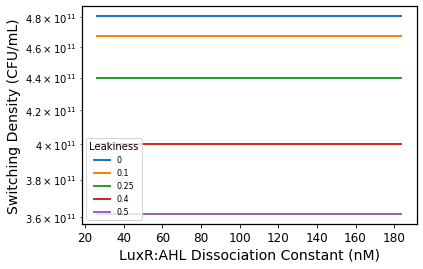

In [24]:
plot2param_vary(params_comp, 'Kd1', 'act_density', 'LuxR:AHL Dissociation Constant (nM)', 'Switching Density (CFU/mL)')
plt.yscale('log');

<module 'matplotlib.pyplot' from 'C:\\Users\\saiak\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

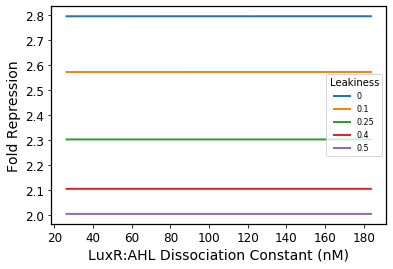

In [25]:
plot2param_vary(params_comp, 'Kd1', 'FoldRepression', 'LuxR:AHL Dissociation Constant (nM)', 'Fold Repression')

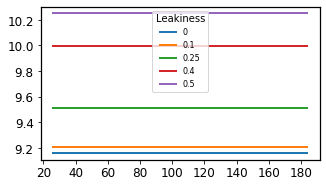

In [26]:
plot2param_vary(params_comp, 'Kd1', 'Transition_time', 'LuxR:AHL Dissociation Constant (nM)', 'Transition Time (hr)')
plt.xlabel('')
plt.ylabel('')
plt.gcf().set_size_inches(5, 2.82)
#plt.savefig('Figures\leaky_couples_tt_kcomp.png', dpi = 256, bbox_inches = 'tight')

## Leakiness + KdnaBind of LuxR:AHL complex

In [11]:
params_bind, gfp_bind = twoParam_vary('alphaT', alphaT_range, 'Kd2', Kd2_range)

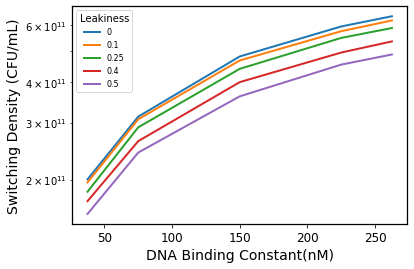

In [28]:
plot2param_vary(params_bind, 'Kd2', 'act_density', 'DNA Binding Constant(nM)', 'Switching Density (CFU/mL)')
plt.yscale('log');

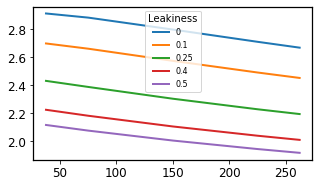

In [29]:
plot2param_vary(params_bind, 'Kd2', 'FoldRepression', 'DNA Binding Constant(nM)', 'Fold Repression')
plt.xlabel('')
plt.ylabel('')
plt.gcf().set_size_inches(5, 2.82)
#plt.savefig('Figures\leaky_couples_fr_Kd2.png', dpi = 256, bbox_inches = 'tight')

<module 'matplotlib.pyplot' from 'C:\\Users\\saiak\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

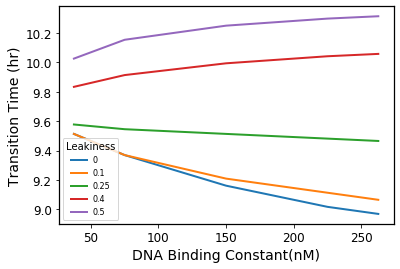

In [30]:
plot2param_vary(params_bind, 'Kd2', 'Transition_time', 'DNA Binding Constant(nM)', 'Transition Time (hr)')

## change kd1 and kd2

In [4]:
params_bind, gfp_bind = twoParam_vary('Kd1', Kd1_range, 'Kd2', Kd2_range)

In [5]:
params_bind

Kd1    Kd2   act_density  FoldRepression  Transition_time       MaxGFP
0    26.25   37.5  2.230509e+10        2.429445         9.577578  3031.207301
1    26.25   75.0  3.066002e+10        2.386246         9.545546  3042.420038
2    26.25  150.0  3.987234e+10        2.302401         9.513514  3050.640138
3    26.25  225.0  4.661840e+10        2.227468         9.481481  3054.130334
4    26.25  262.5  4.909926e+10        2.193209         9.465465  3055.232518
5    52.50   37.5  2.230510e+10        2.429498         9.577578  3031.284633
6    52.50   75.0  3.066002e+10        2.386275         9.545546  3042.468876
7    52.50  150.0  3.987233e+10        2.302412         9.513514  3050.668723
8    52.50  225.0  4.661839e+10        2.227471         9.481481  3054.151075
9    52.50  262.5  4.909926e+10        2.193209         9.465465  3055.250782
10  105.00   37.5  2.230509e+10        2.429571         9.577578  3031.392927
11  105.00   75.0  3.066002e+10        2.386316         9.545546  3042.537355
12  105.00  150.0  3.987233e+10        2.302427         9.513514  3050.708838
13  105.00  225.0  4.661839e+10        2.227475         9.481481  3054.180191
14  105.00  262.5  4.909926e+10        2.193209         9.465465  3055.276426
15  157.50   37.5  2.230510e+10        2.429627         9.577578  3031.475220
16  157.50   75.0  3.066002e+10        2.386346         9.545546  3042.589453
17  157.50  150.0  3.987234e+10        2.302439         9.513514  3050.739382
18  157.50  225.0  4.661839e+10        2.227478         9.481481  3054.202374
19  157.50  262.5  4.909926e+10        2.193209         9.465465  3055.295967
20  183.75   37.5  2.230510e+10        2.429651         9.577578  3031.510942
21  183.75   75.0  3.066002e+10        2.386360         9.545546  3042.612087
22  183.75  150.0  3.987233e+10        2.302444         9.513514  3050.752659
23  183.75  225.0  4.661839e+10        2.227479         9.481481  3054.212017
24  183.75  262.5  4.909926e+10        2.193209         9.465465  3055.304462

## compiled dynamics image for leakiness + dCas9 repression strength

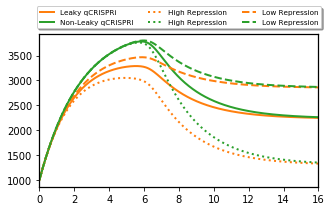

In [12]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5,2.82))
plt.plot(t, gfp[(gfp["alphaT"] == alpha0) & (gfp['activity_ratio'] == 0.4)].GFP, linewidth = 2, label='Leaky qCRISPRi', color = colors[1])
plt.plot(t, gfp[(gfp["alphaT"] == 0) & (gfp['activity_ratio'] == 0.4)].GFP, linewidth = 2, label='Non-Leaky qCRISPRI', color = colors[2])
plt.plot(t, gfp[(gfp["alphaT"] == alpha0) & (gfp['activity_ratio'] == 0.1)].GFP, linewidth = 2, label='High Repression', linestyle = ':', color = colors[1])
plt.plot(t, gfp[(gfp["alphaT"] == 0) & (gfp['activity_ratio'] == 0.1)].GFP, linewidth = 2, label='High Repression', linestyle = ':',  color = colors[2])
plt.plot(t, gfp[(gfp["alphaT"] == alpha0) & (gfp['activity_ratio'] == 0.6)].GFP, linewidth = 2, label='Low Repression', linestyle = '--',  color = colors[1]) 
plt.plot(t, gfp[(gfp["alphaT"] == 0) & (gfp['activity_ratio'] == 0.6)].GFP, linewidth = 2, label='Low Repression', linestyle = '--', color = colors[2])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True,prop={'size': 7.25})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.rc('legend', fontsize=8)
#plt.savefig('Figures\leaky_reprstrength_dynamics.png', dpi = 386, bbox_inches = "tight")

## compiled dynamics image for leakiness + Kcomplex LuxR:AHL

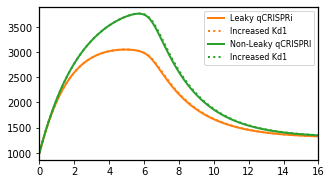

In [13]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5, 2.82))
plt.plot(t, gfp_comp[(gfp_comp["alphaT"] == alpha0) & (gfp_comp['Kd1'] == kd1)].GFP, linewidth = 2, label='Leaky qCRISPRi', color = colors[1]) 
plt.plot(t, gfp_comp[(gfp_comp["alphaT"] == alpha0) & (gfp_comp['Kd1'] == kd1*1.75)].GFP, linewidth = 2, label='Increased Kd1', linestyle = ':', color = colors[1]) 
plt.plot(t, gfp_comp[(gfp_comp["alphaT"] == 0) & (gfp_comp['Kd1'] == kd1)].GFP, linewidth = 2, label='Non-Leaky qCRISPRI', color = colors[2])
plt.plot(t, gfp_comp[(gfp_comp["alphaT"] == 0) & (gfp_comp['Kd1'] == kd1*1.75)].GFP, linewidth = 2, label='Increased Kd1', linestyle = ':',  color = colors[2])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
ax.legend(loc = 'upper right')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.rc('legend', fontsize=7)
#plt.savefig('Figures\leaky_kd1_dynamics.png', dpi = 386, bbox_inches = "tight")

## compiled dynamics image for leakiness + Kdna_bind of LuxR:AHL complex

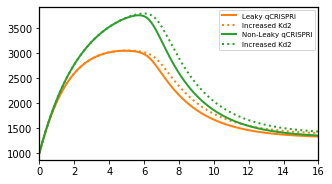

In [14]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5,2.82))
plt.plot(t, gfp_bind[(gfp_bind["alphaT"] == alpha0) & (gfp_bind['Kd2'] == kd2)].GFP, linewidth = 2, label='Leaky qCRISPRi', color = colors[1]) 
plt.plot(t, gfp_bind[(gfp_bind["alphaT"] == alpha0) & (gfp_bind['Kd2'] == kd2*1.75)].GFP, linewidth = 2, label='Increased Kd2', linestyle = ':', color = colors[1]) 
plt.plot(t, gfp_bind[(gfp_bind["alphaT"] == 0) & (gfp_bind['Kd2'] == kd2)].GFP, linewidth = 2, label='Non-Leaky qCRISPRI', color = colors[2])
plt.plot(t, gfp_bind[(gfp_bind["alphaT"] == 0) & (gfp_bind['Kd2'] == kd2*1.75)].GFP, linewidth = 2, label='Increased Kd2', linestyle = ':',  color = colors[2])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
ax.legend(loc = 'upper right')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.rc('legend', fontsize=7)
#plt.savefig('Figures\leaky_kdna_dynamics.png', dpi = 386, bbox_inches = "tight")

## compiled image for dynamics parameters

In [8]:
repr_paramData = pd.DataFrame()
for i in [alpha0, 0]:
    for j in [0.6, 0.4, 0.1]:
        repr_paramData = repr_paramData.append(newRow_forBarplot_df(params, i, 'activity_ratio', j), ignore_index = True)

kd1_paramData = pd.DataFrame()
for i in [alpha0, 0]:
    for j in [kd1*0.25, kd1, kd1*1.75]:
        kd1_paramData = kd1_paramData.append(newRow_forBarplot_df(params_comp, i, 'Kd1', j), ignore_index = True)

kd2_paramData = pd.DataFrame()
for i in [alpha0, 0]:
    for j in [kd2*0.25, kd2, kd2*1.75]:
        kd2_paramData = kd2_paramData.append(newRow_forBarplot_df(params_bind, i, 'Kd2', j), ignore_index = True)

In [68]:
repr_paramData

MaxGFP  Transition_time   act_density  activity_ratio  alphaT
0  3443.682816         5.749750  1.098480e+11             0.6    0.25
1  3272.665811         7.495495  7.028076e+10             0.4    0.25
2  3042.955519         9.513514  3.066002e+10             0.1    0.25
3  3759.582329         6.550551  1.238834e+11             0.6    0.00
4  3737.404287         7.927928  1.021119e+11             0.4    0.00
5  3712.949637         9.321321  8.173368e+10             0.1    0.00

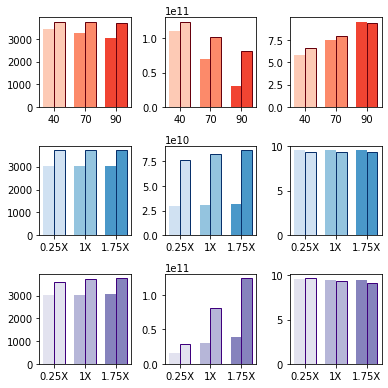

In [64]:
cmap1 = plt.get_cmap('Reds')
colors1 = cmap1([0.2, 0.4, 0.6, 1])
cmap2 = plt.get_cmap('Blues')
colors2 = cmap2([0.2, 0.4, 0.6, 1])
cmap3 = plt.get_cmap('Purples')
colors3 = cmap3([0.2, 0.4, 0.6, 1])


x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

#to create clusters of leaky and non-leaky data had to divided based on second parameter. 
bar1 = repr_paramData[repr_paramData['alphaT'] == alpha0].MaxGFP
bar2 = repr_paramData[repr_paramData['alphaT'] == 0].MaxGFP
bar3 = repr_paramData[repr_paramData['alphaT'] == alpha0].act_density
bar4 = repr_paramData[repr_paramData['alphaT'] == 0].act_density
bar5 = repr_paramData[repr_paramData['alphaT'] == alpha0].Transition_time
bar6 = repr_paramData[repr_paramData['alphaT'] == 0].Transition_time
bar7 = kd1_paramData[kd1_paramData['alphaT'] == alpha0].MaxGFP
bar8 = kd1_paramData[kd1_paramData['alphaT'] == 0].MaxGFP
bar9 = kd1_paramData[kd1_paramData['alphaT'] == alpha0].act_density
bar10 = kd1_paramData[kd1_paramData['alphaT'] == 0].act_density
bar11 = kd1_paramData[kd1_paramData['alphaT'] == alpha0].Transition_time
bar12 = kd1_paramData[kd1_paramData['alphaT'] == 0].Transition_time
bar13 = kd2_paramData[kd2_paramData['alphaT'] == alpha0].MaxGFP
bar14 = kd2_paramData[kd2_paramData['alphaT'] == 0].MaxGFP
bar15 = kd2_paramData[kd2_paramData['alphaT'] == alpha0].act_density
bar16 = kd2_paramData[kd2_paramData['alphaT'] == 0].act_density
bar17 = kd2_paramData[kd2_paramData['alphaT'] == alpha0].Transition_time
bar18 = kd2_paramData[kd2_paramData['alphaT'] == 0].Transition_time


fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (5.5,5.5))
ax1.bar(x - width/2, bar1, width, color = [colors1[0], colors1[1], colors1[2]])
ax1.bar(x + width/2, bar2, width, color = [colors1[0], colors1[1], colors1[2]], edgecolor = colors1[3])
ax2.bar(x - width/2, bar3, width, color = [colors1[0], colors1[1], colors1[2]])
ax2.bar(x + width/2, bar4, width, color = [colors1[0], colors1[1], colors1[2]], edgecolor = colors1[3])
ax3.bar(x - width/2, bar5, width, color = [colors1[0], colors1[1], colors1[2]])
ax3.bar(x + width/2, bar6, width, color = [colors1[0], colors1[1], colors1[2]], edgecolor = colors1[3])
ax4.bar(x - width/2, bar7, width, color = [colors2[0], colors2[1], colors2[2]])
ax4.bar(x + width/2, bar8, width, color = [colors2[0], colors2[1], colors2[2]], edgecolor = colors2[3])
ax5.bar(x - width/2, bar9, width, color = [colors2[0], colors2[1], colors2[2]])
ax5.bar(x + width/2, bar10, width, color = [colors2[0], colors2[1], colors2[2]], edgecolor = colors2[3])
ax6.bar(x - width/2, bar11, width, color = [colors2[0], colors2[1], colors2[2]])
ax6.bar(x + width/2, bar12, width, color = [colors2[0], colors2[1], colors2[2]], edgecolor = colors2[3])
ax7.bar(x - width/2, bar13, width, color = [colors3[0], colors3[1], colors3[2]])
ax7.bar(x + width/2, bar14, width, color = [colors3[0], colors3[1], colors3[2]], edgecolor = colors3[3])
ax8.bar(x - width/2, bar15, width, color = [colors3[0], colors3[1], colors3[2]])
ax8.bar(x + width/2, bar16, width, color = [colors3[0], colors3[1], colors3[2]], edgecolor = colors3[3])
ax9.bar(x - width/2, bar17, width, color = [colors3[0], colors3[1], colors3[2]])
ax9.bar(x + width/2, bar18, width, color = [colors3[0], colors3[1], colors3[2]], edgecolor = colors3[3])






#ax1.set_ylabel('Max GFP')
#ax2.set_ylabel('Switching Density\n(CFU/mL)')
#ax3.set_ylabel('Transition Time (hr)')
#ax4.set_ylabel('Max GFP')
#ax5.set_ylabel('Switching Density\n(CFU/mL)')
#ax6.set_ylabel('Transition Time (hr)')
#ax7.set_ylabel('Max GFP')
#ax8.set_ylabel('Switching Density\n(CFU/mL)')
#ax9.set_ylabel('Transition Time (hr)')


#for some reason first label goes missing. 
ax1.set_xticklabels(labels = ['','40', '70', '90'])
ax2.set_xticklabels(labels = ['','40', '70', '90'])
ax3.set_xticklabels(labels = ['','40', '70', '90'])
ax4.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax5.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax6.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax7.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax8.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax9.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])

fig.tight_layout()
plt.savefig('Figures/twosensi_param_compile.png', dpi = 350, bbox_inches = "tight")

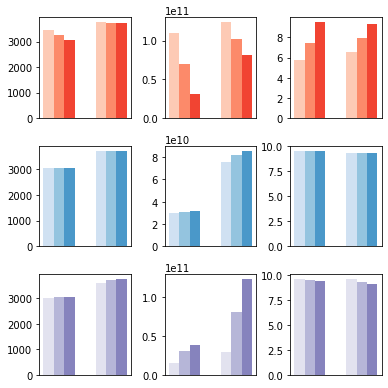

In [66]:
cmap1 = plt.get_cmap('Reds')
colors1 = cmap1([0.2, 0.4, 0.6])
cmap2 = plt.get_cmap('Blues')
colors2 = cmap2([0.2, 0.4, 0.6])
cmap3 = plt.get_cmap('Purples')
colors3 = cmap3([0.2, 0.4, 0.6])


x = np.arange(2)  # the label locations
width = 0.20  # the width of the bars

#to create clusters of leaky and non-leaky data had to divided based on second parameter. 
bar1 = repr_paramData[repr_paramData['activity_ratio'] == 0.6].MaxGFP
bar2 = repr_paramData[repr_paramData['activity_ratio'] == 0.4].MaxGFP
bar3 = repr_paramData[repr_paramData['activity_ratio'] == 0.1].MaxGFP
bar4 = repr_paramData[repr_paramData['activity_ratio'] == 0.6].act_density
bar5 = repr_paramData[repr_paramData['activity_ratio'] == 0.4].act_density
bar6 = repr_paramData[repr_paramData['activity_ratio'] == 0.1].act_density
bar7 = repr_paramData[repr_paramData['activity_ratio'] == 0.6].Transition_time
bar8 = repr_paramData[repr_paramData['activity_ratio'] == 0.4].Transition_time
bar9 = repr_paramData[repr_paramData['activity_ratio'] == 0.1].Transition_time
bar10 = kd1_paramData[kd1_paramData['Kd1'] == kd1*0.25].MaxGFP
bar11 = kd1_paramData[kd1_paramData['Kd1'] == kd1].MaxGFP
bar12 = kd1_paramData[kd1_paramData['Kd1'] == kd1*1.75].MaxGFP
bar13 = kd1_paramData[kd1_paramData['Kd1'] == kd1*0.25].act_density
bar14 = kd1_paramData[kd1_paramData['Kd1'] == kd1].act_density
bar15 = kd1_paramData[kd1_paramData['Kd1'] == kd1*1.75].act_density
bar16 = kd1_paramData[kd1_paramData['Kd1'] == kd1*0.25].Transition_time
bar17 = kd1_paramData[kd1_paramData['Kd1'] == kd1].Transition_time
bar18 = kd1_paramData[kd1_paramData['Kd1'] == kd1*1.75].Transition_time
bar19 = kd2_paramData[kd2_paramData['Kd2'] == kd2*0.25].MaxGFP
bar20 = kd2_paramData[kd2_paramData['Kd2'] == kd2].MaxGFP
bar21 = kd2_paramData[kd2_paramData['Kd2'] == kd2*1.75].MaxGFP
bar22 = kd2_paramData[kd2_paramData['Kd2'] == kd2*0.25].act_density
bar23 = kd2_paramData[kd2_paramData['Kd2'] == kd2].act_density
bar24 = kd2_paramData[kd2_paramData['Kd2'] == kd2*1.75].act_density
bar25 = kd2_paramData[kd2_paramData['Kd2'] == kd2*0.25].Transition_time
bar26 = kd2_paramData[kd2_paramData['Kd2'] == kd2].Transition_time
bar27 = kd2_paramData[kd2_paramData['Kd2'] == kd2*1.75].Transition_time


fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (5.5,5.5))
ax1.bar(x - width, bar1, width, color = colors1[0] )
ax1.bar(x,         bar2, width, color = colors1[1] )
ax1.bar(x + width, bar3, width, color = colors1[2] )
ax2.bar(x - width, bar4, width, color = colors1[0] )
ax2.bar(x,         bar5, width, color = colors1[1] )
ax2.bar(x + width, bar6, width, color = colors1[2] )
ax3.bar(x - width, bar7, width, color = colors1[0] )
ax3.bar(x,         bar8, width, color = colors1[1] )
ax3.bar(x + width, bar9, width, color = colors1[2] )
ax4.bar(x - width, bar10, width, color = colors2[0] )
ax4.bar(x,         bar11, width, color = colors2[1] )
ax4.bar(x + width, bar12, width, color = colors2[2] )
ax5.bar(x - width, bar13, width, color = colors2[0] )
ax5.bar(x,         bar14, width, color = colors2[1] )
ax5.bar(x + width, bar15, width, color = colors2[2] )
ax6.bar(x - width, bar16, width, color = colors2[0] )
ax6.bar(x,         bar17, width, color = colors2[1] )
ax6.bar(x + width, bar18, width, color = colors2[2] )
ax7.bar(x - width, bar19, width, color = colors3[0] )
ax7.bar(x,         bar20, width, color = colors3[1] )
ax7.bar(x + width, bar21, width, color = colors3[2] )
ax8.bar(x - width, bar22, width, color = colors3[0] )
ax8.bar(x,         bar23, width, color = colors3[1] )
ax8.bar(x + width, bar24, width, color = colors3[2] )
ax9.bar(x - width, bar25, width, color = colors3[0] )
ax9.bar(x,         bar26, width, color = colors3[1] )
ax9.bar(x + width, bar27, width, color = colors3[2] )



#ax1.set_ylabel('Max GFP')
#ax2.set_ylabel('Switching Density\n(CFU/mL)')
#ax3.set_ylabel('Transition Time (hr)')
#ax4.set_ylabel('Max GFP')
#ax5.set_ylabel('Switching Density\n(CFU/mL)')
#ax6.set_ylabel('Transition Time (hr)')
#ax7.set_ylabel('Max GFP')
#ax8.set_ylabel('Switching Density\n(CFU/mL)')
#ax9.set_ylabel('Transition Time (hr)')


#for some reason first label goes missing. 
ax1.set_xticklabels(labels = '')
ax2.set_xticklabels(labels = '')
ax3.set_xticklabels(labels = '')
ax4.set_xticklabels(labels = '')
ax5.set_xticklabels(labels = '')
ax6.set_xticklabels(labels = '')
ax7.set_xticklabels(labels = '')
ax8.set_xticklabels(labels = '')
ax9.set_xticklabels(labels = '')


ax1.tick_params(bottom = False)
ax2.tick_params(bottom = False)
ax3.tick_params(bottom = False)
ax4.tick_params(bottom = False)
ax5.tick_params(bottom = False)
ax6.tick_params(bottom = False)
ax7.tick_params(bottom = False)
ax8.tick_params(bottom = False)
ax9.tick_params(bottom = False)


fig.tight_layout()
plt.savefig('Figures\leaky_nonleaky_twosensi_param_compile.png', dpi = 350, bbox_inches = "tight")

## heat map for % change in parameter

In [15]:
repr_paramData1 = pd.DataFrame()
for i in [alpha0, 0]:
    for j in [0.6,0.5, 0.4,0.3,0.2, 0.1]:
        repr_paramData1 = repr_paramData1.append(newRow_forBarplot_df(params, i, 'activity_ratio', j), ignore_index = True)

kd1_paramData1 = pd.DataFrame()
for i in [alpha0, 0]:
    for j in [kd1*0.25, kd1*0.5, kd1, kd1*1.5, kd1*1.75]:
        kd1_paramData1 = kd1_paramData1.append(newRow_forBarplot_df(params_comp, i, 'Kd1', j), ignore_index = True)

kd2_paramData1 = pd.DataFrame()
for i in [alpha0, 0]:
    for j in [kd2*0.25, kd2*0.5, kd2, kd2*1.5, kd2*1.75]:
        kd2_paramData1 = kd2_paramData1.append(newRow_forBarplot_df(params_bind, i, 'Kd2', j), ignore_index = True)

C:\Users\saiak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


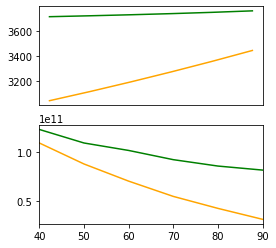

In [113]:
leaky = repr_paramData1[repr_paramData1['alphaT'] == alpha0]
nonleaky = repr_paramData1[repr_paramData1['alphaT'] == 0]
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (4,4))
ax1.plot(leaky.activity_ratio, leaky.MaxGFP, color ='orange')
ax1.plot(nonleaky.activity_ratio, nonleaky.MaxGFP, color = 'green')
ax2.plot(leaky.activity_ratio, leaky.act_density, color ='orange')
ax2.plot(nonleaky.activity_ratio, nonleaky.act_density, color = 'green')

ax1.tick_params(bottom = False)
ax1.set_xticklabels(labels = '')

plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])
fig.show()
plt.savefig('Figures/repr_str_leaky_nonleaky1.png', dpi = 350, bbox_inches = 'tight')

C:\Users\saiak\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


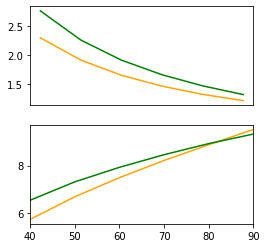

In [114]:
fig, (ax3, ax4) = plt.subplots(2,1, figsize = (4,4))
ax3.plot(leaky.activity_ratio, leaky.FoldRepression, color ='orange')
ax3.plot(nonleaky.activity_ratio, nonleaky.FoldRepression, color = 'green')
ax4.plot(leaky.activity_ratio, leaky.Transition_time, color ='orange')
ax4.plot(nonleaky.activity_ratio, nonleaky.Transition_time, color = 'green')

ax3.tick_params(bottom = False)
ax3.set_xticklabels(labels = '')

plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])
fig.show()
plt.savefig('Figures/repr_str_leaky_nonleaky2.png', dpi = 350, bbox_inches = 'tight')

In [16]:
#repression strength % change
#% change should be (newnumber-base/base)
leaky_base_idx = repr_paramData1[(repr_paramData1['alphaT'] == alpha0) & (repr_paramData1['activity_ratio'] == 0.6)].index[0]
nonleaky_base_idx = repr_paramData1[(repr_paramData1['alphaT'] == 0) & (repr_paramData1['activity_ratio'] == 0.6)].index[0]


leakydf = repr_paramData1[repr_paramData1['alphaT'] == alpha0]
nonleakydf = repr_paramData1[repr_paramData1['alphaT'] == 0]
activity_ratio_percent_change = pd.DataFrame(columns = ['MaxGFP_leaky', 'MaxGFP_nonleaky', 'FoldRepression_leaky','FoldRepression_nonleaky', 'Transition_time_leaky', 'Transition_time_nonleaky', 'act_density_leaky', 'act_density_nonleaky'])

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    per_gfpl = -100*(leakydf.iloc[leaky_base_idx].MaxGFP -leakydf[leakydf['activity_ratio'] == i].MaxGFP.values[0])/leakydf.iloc[leaky_base_idx].MaxGFP
    per_densityl = -100*(leakydf.iloc[leaky_base_idx].act_density -leakydf[leakydf['activity_ratio'] == i].act_density.values[0])/leakydf.iloc[leaky_base_idx].act_density
    per_foldl = -100*(leakydf.iloc[leaky_base_idx].FoldRepression -leakydf[leakydf['activity_ratio'] == i].FoldRepression.values[0])/leakydf.iloc[leaky_base_idx].FoldRepression
    per_timel = -100*(leakydf.iloc[leaky_base_idx].Transition_time -leakydf[leakydf['activity_ratio'] == i].Transition_time.values[0])/leakydf.iloc[leaky_base_idx].Transition_time
    per_gfpnl = -100*(nonleakydf.iloc[leaky_base_idx].MaxGFP -nonleakydf[nonleakydf['activity_ratio'] == i].MaxGFP.values[0])/nonleakydf.iloc[leaky_base_idx].MaxGFP
    per_densitynl = -100*(nonleakydf.iloc[leaky_base_idx].act_density -nonleakydf[nonleakydf['activity_ratio'] == i].act_density.values[0])/nonleakydf.iloc[leaky_base_idx].act_density
    per_foldnl = -100*(nonleakydf.iloc[leaky_base_idx].FoldRepression -nonleakydf[nonleakydf['activity_ratio'] == i].FoldRepression.values[0])/nonleakydf.iloc[leaky_base_idx].FoldRepression
    per_timenl = -100*(nonleakydf.iloc[leaky_base_idx].Transition_time -nonleakydf[nonleakydf['activity_ratio'] == i].Transition_time.values[0])/nonleakydf.iloc[leaky_base_idx].Transition_time
    newrow = {'MaxGFP_leaky': per_gfpl, 'MaxGFP_nonleaky': per_gfpnl,'act_density_leaky':per_densityl, 'act_density_nonleaky':per_densitynl, 
              'FoldRepression_leaky':per_foldl, 'FoldRepression_nonleaky':per_foldnl, 'Transition_time_leaky':per_timel,'Transition_time_nonleaky':per_timenl }
                
    activity_ratio_percent_change = activity_ratio_percent_change.append(newrow, ignore_index = True)
activity_ratio_percent_change

MaxGFP_leaky  MaxGFP_nonleaky  FoldRepression_leaky  \
0    -12.013758        -1.083341             89.684926   
1     -9.831464        -0.911650             57.890214   
2     -7.535329        -0.723462             36.315678   
3     -5.131158        -0.514269             20.768664   
4     -2.621198        -0.276809              9.074789   
5     -0.000000        -0.000000             -0.000000   

   FoldRepression_nonleaky  Transition_time_leaky  Transition_time_nonleaky  \
0               110.695359              63.911846                 39.172749   
1                72.153395              52.892562                 33.576642   
2                45.633758              41.322314                 27.007299   
3                26.284444              29.201102                 19.708029   
4                11.560245              15.977961                 10.948905   
5                -0.000000              -0.000000                 -0.000000   

   act_density_leaky  act_density_nonleaky  
0         -50.553330            -39.313743  
1         -44.076030            -35.318204  
2         -35.609561            -29.820280  
3         -25.872052            -22.325265  
4         -12.993321            -12.904785  
5          -0.000000             -0.000000

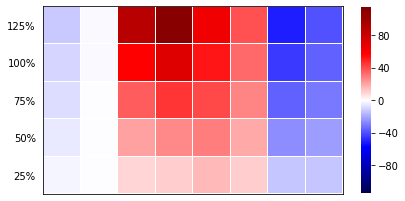

In [18]:
ax = sns.heatmap(activity_ratio_percent_change, linewidth=.05, cmap='seismic', square = True, 
                 cbar_kws={ 'shrink':0.7}, vmin =-115, vmax = 115 )
ax.set_ylim(5, 0)
ax.tick_params(bottom = False, left = False)
ax.set_xticklabels(labels = '')
ax.set_yticklabels(labels = ['125%', '100%', '75%', '50%', '25%'], rotation = 360)
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.tight_layout()
plt.savefig('Figures/activity_ratio_heatmap.png', dpi = 350, bbox_inches = 'tight')

In [19]:
## kd1 percent change calculation
leaky_base_idx = kd1_paramData1[(kd1_paramData1['alphaT'] == alpha0) & (kd1_paramData1['Kd1'] == get_default_params('Kd1'))].index[0]
nonleaky_base_idx = kd1_paramData1[(kd1_paramData1['alphaT'] == 0) & (kd1_paramData1['Kd1'] == get_default_params('Kd1'))].index[0]


leakydf = kd1_paramData1[kd1_paramData1['alphaT'] == alpha0]
nonleakydf = kd1_paramData1[kd1_paramData1['alphaT'] == 0]
kd1_percent_change = pd.DataFrame(columns = ['MaxGFP_leaky', 'MaxGFP_nonleaky', 'FoldRepression_leaky','FoldRepression_nonleaky', 'Transition_time_leaky', 'Transition_time_nonleaky', 'act_density_leaky', 'act_density_nonleaky'],
                                 index = Kd1_range)

for i in [183.75, 157.5, 105.0, 52.5, 26.25]:
    per_gfpl = -100*(leakydf.iloc[leaky_base_idx].MaxGFP -leakydf[leakydf['Kd1'] == i].MaxGFP.values[0])/leakydf.iloc[leaky_base_idx].MaxGFP
    per_densityl = -100*(leakydf.iloc[leaky_base_idx].act_density -leakydf[leakydf['Kd1'] == i].act_density.values[0])/leakydf.iloc[leaky_base_idx].act_density
    per_foldl = -100*(leakydf.iloc[leaky_base_idx].FoldRepression -leakydf[leakydf['Kd1'] == i].FoldRepression.values[0])/leakydf.iloc[leaky_base_idx].FoldRepression
    per_timel = -100*(leakydf.iloc[leaky_base_idx].Transition_time -leakydf[leakydf['Kd1'] == i].Transition_time.values[0])/leakydf.iloc[leaky_base_idx].Transition_time
    per_gfpnl = -100*(nonleakydf.iloc[leaky_base_idx].MaxGFP -nonleakydf[nonleakydf['Kd1'] == i].MaxGFP.values[0])/nonleakydf.iloc[leaky_base_idx].MaxGFP
    per_densitynl = -100*(nonleakydf.iloc[leaky_base_idx].act_density -nonleakydf[nonleakydf['Kd1'] == i].act_density.values[0])/nonleakydf.iloc[leaky_base_idx].act_density
    per_foldnl = -100*(nonleakydf.iloc[leaky_base_idx].FoldRepression -nonleakydf[nonleakydf['Kd1'] == i].FoldRepression.values[0])/nonleakydf.iloc[leaky_base_idx].FoldRepression
    per_timenl = -100*(nonleakydf.iloc[leaky_base_idx].Transition_time -nonleakydf[nonleakydf['Kd1'] == i].Transition_time.values[0])/nonleakydf.iloc[leaky_base_idx].Transition_time
    newrow = {'MaxGFP_leaky': per_gfpl, 'MaxGFP_nonleaky': per_gfpnl,'act_density_leaky':per_densityl, 'act_density_nonleaky':per_densitynl, 
              'FoldRepression_leaky':per_foldl, 'FoldRepression_nonleaky':per_foldnl, 'Transition_time_leaky':per_timel,'Transition_time_nonleaky':per_timenl }
                
    kd1_percent_change = kd1_percent_change.append(newrow, ignore_index = True)
kd1_percent_change.dropna(inplace = True)
#kd1_percent_change.set_index(['75%', '50%', '0', '-50%', '-75%'])
    
    

In [20]:
#kd2_percent change calculation

leaky_base_idx = kd2_paramData1[(kd2_paramData1['alphaT'] == alpha0) & (kd2_paramData1['Kd2'] == get_default_params('Kd2'))].index[0]
nonleaky_base_idx = kd2_paramData1[(kd2_paramData1['alphaT'] == 0) & (kd2_paramData1['Kd2'] == get_default_params('Kd2'))].index[0]


leakydf = kd2_paramData1[kd2_paramData1['alphaT'] == alpha0]
nonleakydf = kd2_paramData1[kd2_paramData1['alphaT'] == 0]
kd2_percent_change = pd.DataFrame(columns = ['MaxGFP_leaky', 'MaxGFP_nonleaky', 'FoldRepression_leaky','FoldRepression_nonleaky', 'Transition_time_leaky', 'Transition_time_nonleaky', 'act_density_leaky', 'act_density_nonleaky'])

for i in [262.5, 225, 150, 75, 37.5]:
    per_gfpl = -100*(leakydf.iloc[leaky_base_idx].MaxGFP -leakydf[leakydf['Kd2'] == i].MaxGFP.values[0])/leakydf.iloc[leaky_base_idx].MaxGFP
    per_densityl = -100*(leakydf.iloc[leaky_base_idx].act_density -leakydf[leakydf['Kd2'] == i].act_density.values[0])/leakydf.iloc[leaky_base_idx].act_density
    per_foldl = -100*(leakydf.iloc[leaky_base_idx].FoldRepression -leakydf[leakydf['Kd2'] == i].FoldRepression.values[0])/leakydf.iloc[leaky_base_idx].FoldRepression
    per_timel = -100*(leakydf.iloc[leaky_base_idx].Transition_time -leakydf[leakydf['Kd2'] == i].Transition_time.values[0])/leakydf.iloc[leaky_base_idx].Transition_time
    per_gfpnl = -100*(nonleakydf.iloc[leaky_base_idx].MaxGFP -nonleakydf[nonleakydf['Kd2'] == i].MaxGFP.values[0])/nonleakydf.iloc[leaky_base_idx].MaxGFP
    per_densitynl = -100*(nonleakydf.iloc[leaky_base_idx].act_density -nonleakydf[nonleakydf['Kd2'] == i].act_density.values[0])/nonleakydf.iloc[leaky_base_idx].act_density
    per_foldnl = -100*(nonleakydf.iloc[leaky_base_idx].FoldRepression -nonleakydf[nonleakydf['Kd2'] == i].FoldRepression.values[0])/nonleakydf.iloc[leaky_base_idx].FoldRepression
    per_timenl = -100*(nonleakydf.iloc[leaky_base_idx].Transition_time -nonleakydf[nonleakydf['Kd2'] == i].Transition_time.values[0])/nonleakydf.iloc[leaky_base_idx].Transition_time
    newrow = {'MaxGFP_leaky': per_gfpl, 'MaxGFP_nonleaky': per_gfpnl,'act_density_leaky':per_densityl, 'act_density_nonleaky':per_densitynl, 
              'FoldRepression_leaky':per_foldl, 'FoldRepression_nonleaky':per_foldnl, 'Transition_time_leaky':per_timel,'Transition_time_nonleaky':per_timenl }
                
    kd2_percent_change = kd2_percent_change.append(newrow, ignore_index = True)
kd2_percent_change.dropna(inplace = True)
#kd2_percent_change.set_index(['75%', '50%', '0', '-50%', '-75%'])
    
    

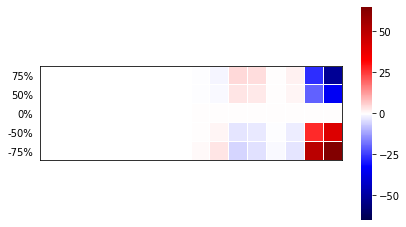

In [137]:
total_percent = pd.concat([kd1_percent_change, kd2_percent_change], axis =1)
ax = sns.heatmap(total_percent, linewidth=.05, cmap='seismic', square = True, 
                 cbar_kws={ 'shrink':0.8}, vmin =-65, vmax = 65 )
ax.set_ylim(5, 0)
ax.tick_params(bottom = False, left = False)
ax.set_xticklabels(labels = '')
ax.set_yticklabels(labels = ['75%', '50%', '0%', '-50%', '-75%'], rotation = 360)
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.tight_layout()
#plt.savefig('Figures\kd1_heatmap.png', dpi = 350, bbox_inches = 'tight')

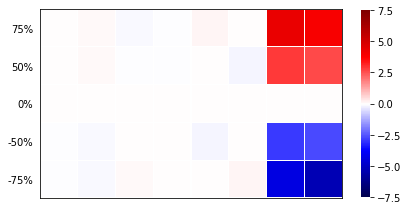

In [23]:
ax = sns.heatmap(kd1_percent_change, linewidth=.05, cmap='seismic', square = True, 
                 cbar_kws={ 'shrink':0.7}, vmin =-7.5, vmax = 7.5 )
ax.set_ylim(5, 0)
ax.tick_params(bottom = False, left = False)
ax.set_xticklabels(labels = '')
ax.set_yticklabels(labels = ['75%', '50%', '0%', '-50%', '-75%'], rotation = 360)
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.tight_layout()
plt.savefig('Figures\kd1_heatmap.png', dpi = 350, bbox_inches = 'tight')

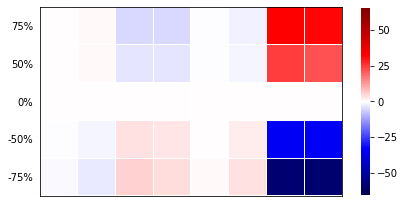

In [24]:
ax = sns.heatmap(kd2_percent_change, linewidth=.05, cmap='seismic', square = True, cbar_kws={ 'shrink':0.7},
                vmin = -65, vmax = 65)
ax.set_ylim(5, 0)
ax.tick_params(bottom = False, left = False)
ax.set_xticklabels(labels = '')
ax.set_yticklabels(labels = ['75%', '50%', '0%', '-50%', '-75%'], rotation = 360)
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.tight_layout()
plt.savefig('Figures\kd2_heatmap.png', dpi =350, bbox_inches = 'tight')

## compiled leaky vs non-leaky switch parameters

In [151]:
repr_paramData1

FoldRepression       MaxGFP  Transition_time   act_density  \
0         1.204875  3443.682816         5.749750  1.098480e+11   
1         1.315736  3356.234294         6.694695  8.807736e+10   
2         1.458694  3272.665811         7.495495  7.028076e+10   
3         1.648848  3192.622484         8.216216  5.444109e+10   
4         1.912857  3116.026951         8.872873  4.201002e+10   
5         2.302292  3042.955519         9.513514  3.066002e+10   
6         1.311871  3759.582329         6.550551  1.238834e+11   
7         1.463656  3747.628563         7.319319  1.098480e+11   
8         1.657315  3737.404287         7.927928  1.021119e+11   
9         1.912263  3728.406638         8.456456  9.255036e+10   
10        2.262449  3720.314199         8.920921  8.591487e+10   
11        2.772898  3712.949637         9.321321  8.173368e+10   

    activity_ratio  alphaT  
0              0.6    0.25  
1              0.5    0.25  
2              0.4    0.25  
3              0.3    0.25  
4              0.2    0.25  
5              0.1    0.25  
6              0.6    0.00  
7              0.5    0.00  
8              0.4    0.00  
9              0.3    0.00  
10             0.2    0.00  
11             0.1    0.00

In [25]:
leaky_repr = repr_paramData1[(repr_paramData1['alphaT'] == 0.25) & (repr_paramData1['activity_ratio'] == 0.1)]
nonleaky_repr = repr_paramData1[(repr_paramData1['alphaT'] == 0) & (repr_paramData1['activity_ratio'] == 0.1)]
gfp = 100*(nonleaky_repr.MaxGFP.values[0]-leaky_repr.MaxGFP.values[0])/nonleaky_repr.MaxGFP.values[0]
density = 100*(nonleaky_repr.act_density.values[0]-leaky_repr.act_density.values[0])/nonleaky_repr.act_density.values[0]
fold = 100*(nonleaky_repr.FoldRepression.values[0]-leaky_repr.FoldRepression.values[0])/nonleaky_repr.FoldRepression.values[0]
time = 100*(nonleaky_repr.Transition_time.values[0]-leaky_repr.Transition_time.values[0])/nonleaky_repr.Transition_time.values[0]

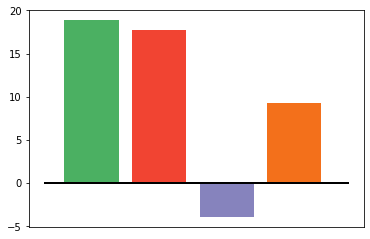

In [27]:
cmap1 = plt.get_cmap('Oranges')
orange = cmap1(0.6)
cmap2 = plt.get_cmap('Purples')
purple = cmap2(0.6)
cmap3 = plt.get_cmap('Greens')
green = cmap3(0.6)
cmap4 = plt.get_cmap('Reds')
red = cmap4(0.6)
X = np.arange(4)
width = 0.8
fig, ax = plt.subplots()
ax.bar(X-width, [gfp, fold, time, density], width, color = [green,  red, purple, orange,])
ax.tick_params(bottom = False)
ax.set_xticklabels(labels = '')
plt.hlines(y= 0, xmin= -1.5, xmax= 3, color='black', linewidth = 2)
plt.show()
fig.savefig('Figures\params_leaky_vs_nonleaky.png', dpi = 350, bbox_inches = 'tight')

# Stringency of LuxR

## parameter variation with changing stringency

IndexError: index 0 is out of bounds for axis 0 with size 0

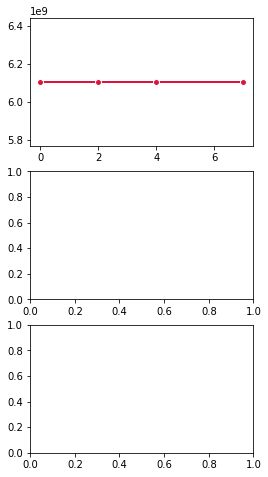

In [7]:
#simulating qcrispri dynamics with varying dissociation constant of LuxR_AHL complex and calculating 
#parameters switching density, fold repression, and transition time
stringency_range = [0, 2, 4, 7]
param_str = pd.DataFrame(columns=['Stringency', 'act_density', 'FoldRepression', 'Transition_time'])
qcrispridf = convert2df()
for i in stringency_range:
    qcrispridf.qcrispriSimple(solve_qCRISPRiSimple())
    qcrispri_df = qcrispridf.returndf()
    s_density = switch_density(qcrispri_df, t)
    fold_rep = foldRepression(qcrispri_df)
    t_time = transition_time(qcrispri_df, t)
    new_row = {'Stringency':i, 'act_density': s_density, 'FoldRepression': fold_rep, 'Transition_time':t_time}
    param_str = param_str.append(new_row, ignore_index = True)
    
fig = vStack_3plots(param_str, 'Stringency', 'Stringency of LuxR')

## Variation in dynamics with change in stringency

In [32]:
qcrispriSimpledf = convert2df()
fig = go.Figure()
qcrispriSimpledf.qcrispriSimple(solve_qCRISPRiSimple())
qcrispri_df = qcrispriSimpledf.returndf()

qcrispriSimpledf.qcrispriSimple(solve_qCRISPRiSimple(alphaRL = 0, KD =175))
qcrispri_df1 = qcrispriSimpledf.returndf()


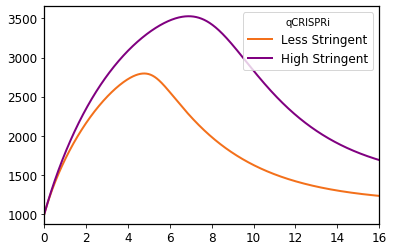

In [38]:


cmap1 = plt.get_cmap('Oranges')
color1 = cmap1(0.6)
fig, ax = plt.subplots()
plt.plot(t, qcrispri_df.GFP, linewidth = 2, label='Less Stringent', color = color1) 
plt.plot(t, qcrispri_df1.GFP, linewidth = 2, label='High Stringent', color = 'purple') 



ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
ax.legend(loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=12)
plt.legend(title = 'qCRISPRi')
#plt.savefig('Figures\LuxR_str_dynamics.png',dpi = 600, bbox_inches = 'tight')

## bar plots for parameter variation.

In [13]:
str_df = pd.DataFrame(columns = ['wildtype', 'mutant'], index = ['maxgfp', 'act_density', 'foldrepression', 'transition_time'])
row1 = {'wildtype': max(qcrispri_df.GFP), 'mutant':max(qcrispri_df1.GFP)}
row2 = {'wildtype': switch_density(qcrispri_df, t), 'mutant':switch_density(qcrispri_df1, t)}
row3 = {'wildtype': foldRepression(qcrispri_df), 'mutant':(qcrispri_df1)}
row4 = {'wildtype': transition_time(qcrispri_df, t), 'mutant':transition_time(qcrispri_df1, t)}
str_df.loc['maxgfp'] = row1
str_df.loc['act_density'] = row2
str_df.loc['foldrepression'] = row3
str_df.loc['transition_time'] = row4
str_df['percent_change'] = 100*(str_df.mutant - str_df.wildtype)/str_df.wildtype
str_df

wildtype               mutant percent_change
maxgfp                  2880.413635          3056.458868       6.111804
act_density      976668250052.28833  999964344221.178223       2.385262
foldrepression             1.695406             1.255728     -25.933517
transition_time            9.337337             7.415415      -20.58319

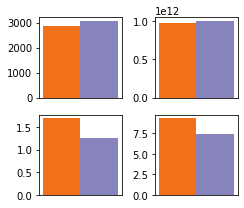

In [14]:
cmap1 = plt.get_cmap('Oranges')
color1 = cmap1(0.6)
cmap2 = plt.get_cmap('Purples')
color2 = cmap2(0.6)

x = np.arange(1)  # the label locations
width = 0.10  # the width of the bars
bar1 = str_df.wildtype
bar2 = str_df.mutant

fig, ((ax1,ax11),(ax2, ax21)) = plt.subplots(2,2, figsize=(3.5,3))
ax1.bar(x        , [bar1[0]], width, color = color1)
ax1.bar(x + width, [bar2[0]], width, color = color2)

#ax11 = ax1.twinx()
ax11.bar(1 - width, [bar1[1]], width, color = color1)
ax11.bar(1        , [bar2[1]], width, color = color2)
#ax1.set_ylabel('GFP (au)')
#ax11.set_ylabel('CFU/mL')

ax2.bar(x        , [bar1[2]], width, color = color1)
ax2.bar(x + width, [bar2[2]], width, color = color2)

#ax21 = ax2.twinx()
ax21.bar(1 - width, [bar1[3]], width, color = color1)
ax21.bar(1        , [bar2[3]], width, color = color2)
#ax2.set_ylabel('Fold Change')
#ax21.set_ylabel('Hours')

ax1.set_xticklabels(labels = '')
ax2.set_xticklabels(labels = '')
ax11.set_xticklabels(labels = '')
ax21.set_xticklabels(labels = '')
ax1.tick_params(bottom = False)
ax2.tick_params(bottom = False)
ax11.tick_params(bottom = False)
ax21.tick_params(bottom = False)
fig.tight_layout()
#fig.savefig('Figures\LuxR_str_param.png',dpi = 450,  bbox_inches = 'tight')

# Sponge design

In [17]:
decoy_range = [0, 2, 5, 10, 20, 40]
gfp_decoy, params_decoy = decoysite_vary("decoy_sites", decoy_range )

qcrispriSimpledf = convert2df()
qcrispriSimpledf.qcrispri(solve_qCRISPRi())
qcrispri_df = qcrispriSimpledf.returndf()

## compiled dynamics plot

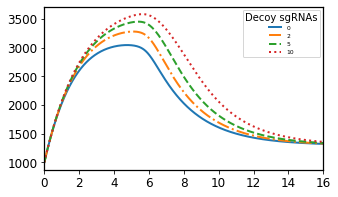

In [38]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(t, qcrispri_df.GFP, linewidth = 2, label='0', color = colors[0]) 
plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 2].GFP, linewidth = 2, linestyle = "-.", label='2', color = colors[1])
plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 5].GFP, linewidth = 2, linestyle = '--', label='5', color = colors[2])  
plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 10].GFP, linewidth = 2, linestyle = ':', label='10', color = colors[3])
#plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 20].GFP, linewidth = 2, linestyle = '-.', label='20', color = colors[4])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
leg = ax.legend(prop={"size":12})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Decoy sgRNAs', loc='upper right')
plt.rc('legend', fontsize=12)
plt.savefig('Figures\sponge_dynamics.png', dpi = 386, bbox_inches = 'tight')

## compiled parameter vary plot

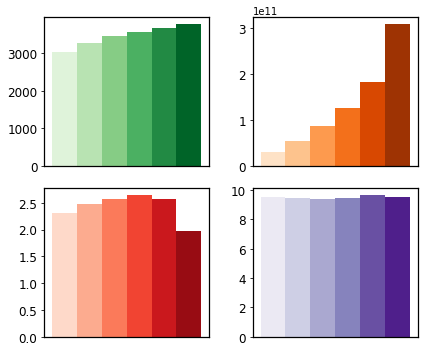

In [35]:
cmap1 = plt.get_cmap('Oranges')
colors1 = cmap1([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])
cmap2 = plt.get_cmap('Purples')
colors2 = cmap2([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])
cmap3 = plt.get_cmap('Greens')
colors3 = cmap3([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])
cmap4 = plt.get_cmap('Reds')
colors4 = cmap4([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])

width = 0.20
x = [(0-2*width), (0-width), 0, 0+width, 0+2*width, 0+3*width]
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize = (6,5))
for i in range(len(x)):
    ax1.bar(x[i], params_decoy.MaxGFP[i], width, color = colors3[i])
    ax2.bar(x[i], params_decoy.act_density[i], width, color = colors1[i])
    ax3.bar(x[i], params_decoy.FoldRepression[i], width, color = colors4[i])
    ax4.bar(x[i], params_decoy.Transition_time[i], width, color = colors2[i])
for i in ['right', 'left', 'top', 'bottom']:
    ax1.spines[i].set(linewidth = 1.25)
    ax2.spines[i].set(linewidth = 1.25)
    ax3.spines[i].set(linewidth = 1.25)
    ax4.spines[i].set(linewidth = 1.25)

ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax3.tick_params(labelsize = 12)
ax4.tick_params(labelsize = 12)
    
#ax1.set_ylabel('GFP (au)')
#ax2.set_ylabel('Cell Density (CFU/mL)')
#ax3.set_ylabel('Fold Change')
#ax4.set_ylabel('Time (hr)')

#ax1.set_xlabel('Max GFP')
#ax2.set_xlabel('Switching Density')
#ax3.set_xlabel('Fold Repression')
#ax4.set_xlabel('Transition Time')

ax1.tick_params(bottom = False)
ax1.set_xticklabels(labels = '')
ax2.tick_params(bottom = False)
ax2.set_xticklabels(labels = '')
ax3.tick_params(bottom = False)
ax3.set_xticklabels(labels = '')
ax4.tick_params(bottom = False)
ax4.set_xticklabels(labels = '')
fig.tight_layout()
fig.savefig('Figures\sponge_param_compile.png', dpi = 300, bbox_inches = 'tight')

## compiled Gamma parameter plot

In [32]:
params_decoy['gamma'] = params_decoy.Transition_time/ params_decoy.FoldRepression

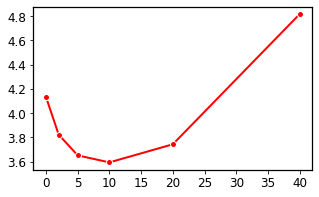

In [33]:
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(params_decoy.decoy_sites, params_decoy.gamma, "C1o-", mec = '1.0', color = 'red', linewidth = 2)
for i in ['right', 'left', 'top', 'bottom']:
        ax.spines[i].set(linewidth = 1.25)
#plt.xlabel('Decoy Sites', fontsize = 14)
#plt.ylabel('Gamma (hr)',  fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
fig.savefig('Figures\sponge_gamma.png', dpi = 400, bbox_inches = 'tight')

## Switching density vs Decoy sites

In [19]:
params_decoy

decoy_sites   act_density  FoldRepression  Transition_time       MaxGFP
0          0.0  3.066002e+10        2.302292         9.513514  3042.955519
1          2.0  5.444109e+10        2.468075         9.433433  3278.061536
2          5.0  8.591487e+10        2.579594         9.417417  3450.566553
3         10.0  1.268689e+11        2.638971         9.481481  3581.497118
4         20.0  1.834276e+11        2.576381         9.641642  3688.019323
5         40.0  3.073336e+11        1.971345         9.497497  3769.059950

In [35]:
params_decoy.iloc[3].act_density

126868928363.39598

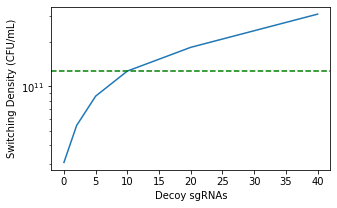

In [40]:
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(params_decoy.decoy_sites, params_decoy.act_density)
plt.axhline(y=params_decoy.iloc[3].act_density, color='g', linestyle='--')
ax.set_yscale('log')
plt.xlabel('Decoy sgRNAs')
plt.ylabel('Switching Density (CFU/mL)')
plt.show()
fig.savefig('Figures\decoy_switching_density.png', dpi = 400, bbox_inches = 'tight')